In [6]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

100%|██████████| 80.9M/80.9M [00:24<00:00, 3.52MB/s]

Extracting files...


Path to dataset files: C:\Users\91884\.cache\kagglehub\datasets\kazanova\sentiment140\versions\2


In [7]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91884\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [10]:
import pandas as pd

# Path to dataset files
data_path = '/root/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2/training.1600000.processed.noemoticon.csv'

# Read the CSV file with the specified encoding
data = pd.read_csv(data_path, encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2/training.1600000.processed.noemoticon.csv'

In [ ]:
data.head()

In [ ]:
data.shape

# Data Pre-processing

In [ ]:
col_name=['target','id','date','flag','user','text']
twit_data=pd.read_csv(data_path, names=col_name, encoding='ISO-8859-1')

In [ ]:
twit_data.head()

In [ ]:
twit_data['target'].value_counts()

In [ ]:
twit_data.replace({"target":{4:1}}, inplace=True)

In [ ]:
twit_data['target'].value_counts()

**STEMMING**

In [ ]:
port_stem=PorterStemmer()

In [ ]:
# Sample 10% of the data
sample_size = int(0.1 * len(twit_data))  # Adjust the percentage as needed
twit_data_sampled = twit_data.sample(n=sample_size, random_state=2)  # Use random_state for reproducibility

# Now use 'twit_data_sampled' instead of 'twit_data' in the following steps.

In [ ]:
twit_data_sampled['target'].value_counts()


In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

port_stem = PorterStemmer()
english_stopwords = set(stopwords.words('english'))

In [26]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', " ", content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in english_stopwords]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content

In [27]:
twit_data_sampled = pd.DataFrame({'text': ['some example text', 'another example']})

**Vectorization with TF-IDF**

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = twit_data_sampled['stemmed_content']
Y = twit_data_sampled['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train) # Store vectorized X_train
X_test_vec = vectorizer.transform(X_test)       # Store vectorized X_test

KeyError: 'stemmed_content'

In [21]:
twit_data_sampled.head()

,text
0,some example text
1,another example


In [25]:
print(X_train_vec.shape)

NameError: name 'X_train_vec' is not defined

In [ ]:
X_test_vec.shape

(32000, 93701)

In [ ]:
X_train


,stemmed_content
1009274,smj noway faster music select fli
31090,ggrrrrrrr nearli finish first knit row bugger ...
1507261,osg truth go like hour day
830589,pleas f back bbc much better coverag well done...
1514431,andymanc help appreci
...,...
811842,hang one fav texa sweet fun
856112,wybew oocss often recogn loos object wonder ca...
615401,quot ipod cannot sync unknown error occur quot...
99219,maryraquel naww shit gurl suck sorri


In [24]:
X_train_vec.toarray()

NameError: name 'X_train_vec' is not defined

# Models Fitting

**Logistic Regression**

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec,Y_train)

NameError: name 'X_train_vec' is not defined

In [ ]:
prediction=model.predict(X_train_vec)
accuracy_X=accuracy_score(Y_train,prediction)

In [ ]:
print("Accuracy score for train data :",accuracy_X)

Accuracy score for train data : 0.8229375


In [ ]:
prediction=model.predict(X_test_vec)
accuracy_Y=accuracy_score(Y_test,prediction)

In [ ]:
print('Accuracy score for test data',accuracy_Y)

Accuracy score for test data 0.76653125


**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=4)

# Train the model using vectorized data
knn_model.fit(X_train_vec, Y_train)

# Make predictions using vectorized data
knn_predictions = knn_model.predict(X_test_vec)

# Evaluate the model
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 0.5636875


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train_vec, Y_train)

# Make predictions
tree_predictions = tree_model.predict(X_test_vec)

# Evaluate the model
tree_accuracy = accuracy_score(Y_test, tree_predictions)
print("Decision Tree Accuracy:", tree_accuracy)

Decision Tree Accuracy: 0.69234375


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1)
rf_model.fit(X_train_vec, Y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [ ]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_vec)

# Calculate accuracy
rf_accuracy = accuracy_score(Y_test, rf_predictions)

# Print the accuracy
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.7528125


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_vec, Y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test_vec)

# Evaluate the model
nb_accuracy = accuracy_score(Y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.7433125


**Support Vector Machine**

In [ ]:
from sklearn.svm import LinearSVC

linear_svc_model = LinearSVC(max_iter=10000)  # Adjust max_iter if needed
linear_svc_model.fit(X_train_vec, Y_train)

linear_svc_predictions = linear_svc_model.predict(X_test_vec)

linear_svc_accuracy = accuracy_score(Y_test, linear_svc_predictions)
print("LinearSVC Accuracy:", linear_svc_accuracy)

LinearSVC Accuracy: 0.751625


**Gradient Descent**

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss='hinge', max_iter=10000)  # Adjust max_iter if needed
sgd_model.fit(X_train_vec, Y_train)

sgd_predictions = sgd_model.predict(X_test_vec)

sgd_accuracy = accuracy_score(Y_test, sgd_predictions)
print("SGDClassifier Accuracy:", sgd_accuracy)

SGDClassifier Accuracy: 0.758


In [ ]:
X AI LIME..., AI Models

# Confusion matrices

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def display_confusion_matrix_with_accuracy(model_name, predictions, true_labels, accuracy):
    cm = confusion_matrix(true_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} (Accuracy: {accuracy:.4f})') # Display accuracy in title
    plt.show()

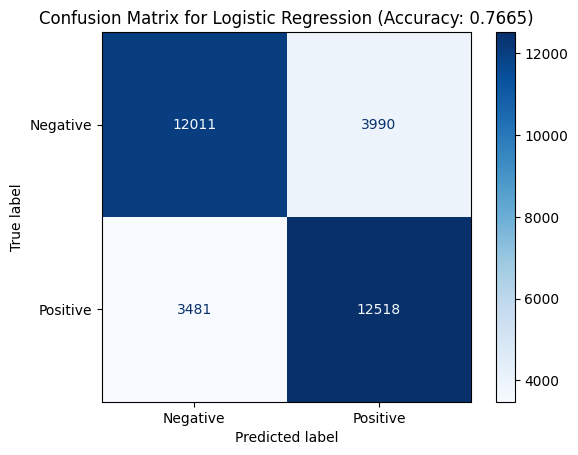

In [ ]:
display_confusion_matrix_with_accuracy('Logistic Regression', prediction, Y_test, accuracy_Y)


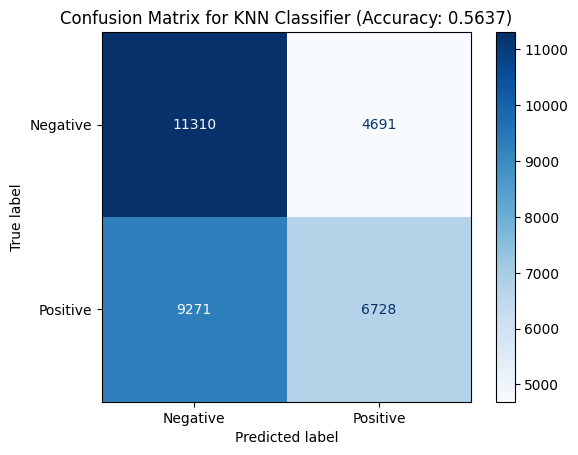

In [ ]:
display_confusion_matrix_with_accuracy('KNN Classifier', knn_predictions, Y_test, knn_accuracy)


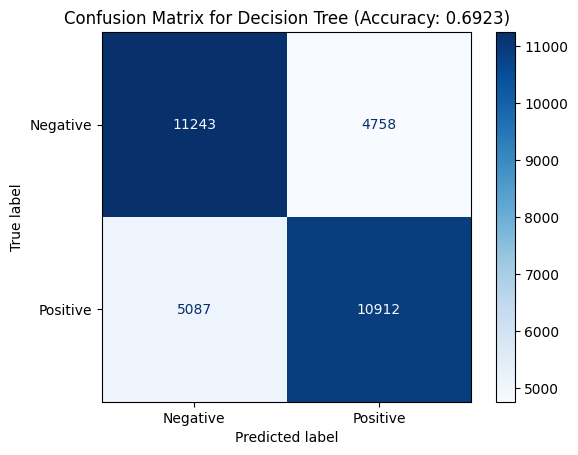

In [ ]:
display_confusion_matrix_with_accuracy('Decision Tree', tree_predictions, Y_test, tree_accuracy)


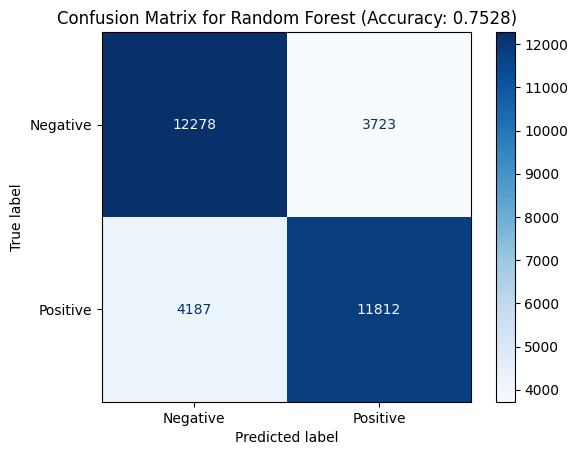

In [ ]:
display_confusion_matrix_with_accuracy('Random Forest', rf_predictions, Y_test, rf_accuracy)


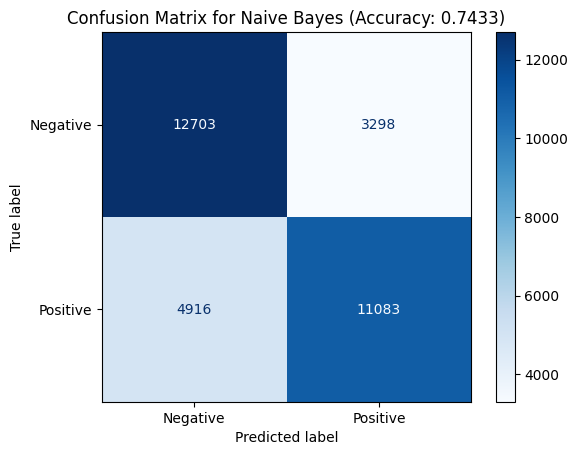

In [ ]:
display_confusion_matrix_with_accuracy('Naive Bayes', nb_predictions, Y_test, nb_accuracy)


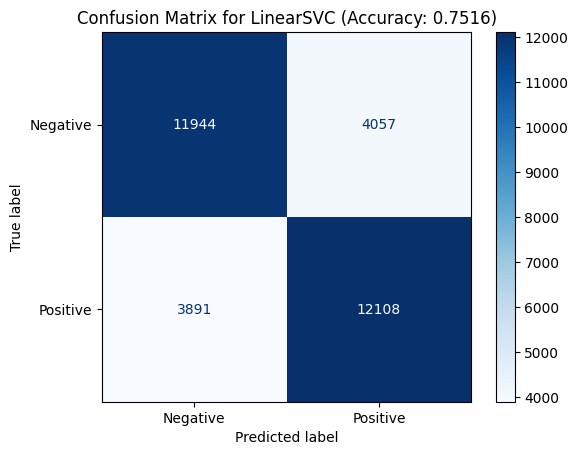

In [ ]:
display_confusion_matrix_with_accuracy('LinearSVC', linear_svc_predictions, Y_test, linear_svc_accuracy)


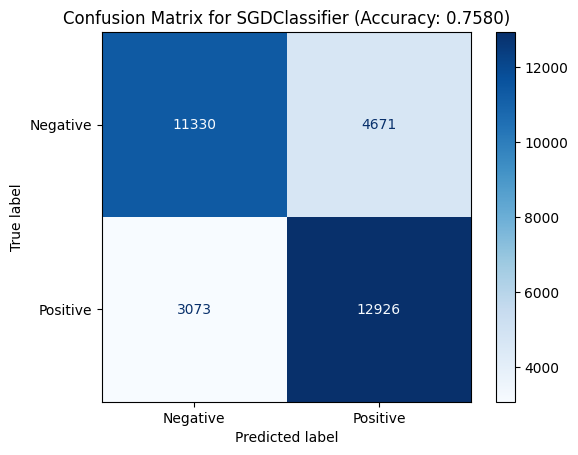

In [ ]:
display_confusion_matrix_with_accuracy('SGDClassifier', sgd_predictions, Y_test, sgd_accuracy)

# Input Predictions

In [ ]:
import random

# Select four random indices
random_indices = random.sample(range(len(twit_data_sampled)), 4)

# Display target and tweet for the selected indices
for index in random_indices:
    target = twit_data_sampled.iloc[index]['target']
    tweet = twit_data_sampled.iloc[index]['text']
    print(f"Target: {target}, Tweet: {tweet}")

Target: 1, Tweet: GoGoGo... move up by 1  24. tribbleagency.com
Target: 0, Tweet: @HighTechDad I think that's what happened. I knew getting it early was too good to be true!  
Target: 1, Tweet: Just finished reading Eclipse......ready for the next book....Mood: I'm such a reader now   Yay Me!!
Target: 0, Tweet: Have to do stupid chores 


In [ ]:
def preprocess_sentence(sentence):
  stemmed_content = re.sub('[^a-zA-Z]', " ", sentence)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in english_stopwords]
  stemmed_content = " ".join(stemmed_content)
  return stemmed_content

new_sentence = "The sun is shining brightly today, making it a perfect day for a walk in the park."
processed_sentence = preprocess_sentence(new_sentence)

In [ ]:
new_sentence_vec = vectorizer.transform([processed_sentence])

In [ ]:
from IPython.display import display, HTML

def predict_sentiment_all_models(sentence, models):
    """Predicts sentiment using all models and displays results.

    Args:
        sentence: The input sentence.
        models: A dictionary of trained models with model names as keys.
    """

    processed_sentence = preprocess_sentence(sentence)
    new_sentence_vec = vectorizer.transform([processed_sentence])

    results = {}
    for model_name, model in models.items():
        prediction = model.predict(new_sentence_vec)[0]
        sentiment = "Positive" if prediction == 1 else "Negative"
        results[model_name] = sentiment

    # Display results in a table format
    table_html = "<table><tr><th>Model</th><th>Sentiment</th></tr>"
    for model_name, sentiment in results.items():
        table_html += f"<tr><td>{model_name}</td><td>{sentiment}</td></tr>"
    table_html += "</table>"
    display(HTML(table_html))


# Your trained models (replace with your actual model variables)
models = {
    'Logistic Regression': model,
    'KNN Classifier': knn_model,
    'Decision Tree': tree_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model,
    'LinearSVC': linear_svc_model,
    'SGDClassifier': sgd_model,
}

# The sentence to predict
new_sentence = "The sun is shining brightly today, making it a perfect day for a walk in the park."

# Predict and display results
predict_sentiment_all_models(new_sentence, models)

Model,Sentiment
Logistic Regression,Positive
KNN Classifier,Negative
Decision Tree,Positive
Random Forest,Positive
Naive Bayes,Positive
LinearSVC,Positive
SGDClassifier,Positive
